In [1]:
#Packages & Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pickle

In [2]:
pip show scikit-learn 

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ls97k\miniconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: oracle-ads
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing data
data = pd.read_csv('../data/laptop_price_processed.csv')
data.head()

,Ram,Price_euros,Touchscreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
0,8,1339.69,0,1,226.983005,0,128,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,8,898.94,0,0,127.677940,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,8,575.00,0,0,141.211998,0,256,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,2537.45,0,1,220.534624,0,512,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1803.60,0,1,226.983005,0,256,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
data.describe()

,Ram,Price_euros,Touchscreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,...,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,8.429352,1128.837783,0.146760,0.278689,146.448451,420.765027,184.355972,0.078064,0.016393,0.120999,...,0.070258,0.864949,0.047619,0.105386,0.326308,0.409055,0.111632,0.139735,0.548790,0.311475
std,5.099621,696.945545,0.354005,0.448529,42.935590,517.436326,185.601517,0.268377,0.127033,0.326254,...,0.255680,0.341911,0.213042,0.307171,0.469044,0.491852,0.315036,0.346847,0.497808,0.463277
min,2.000000,191.900000,0.000000,0.000000,90.583402,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,609.000000,0.000000,0.000000,127.335675,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,979.000000,0.000000,0.000000,141.211998,0.000000,256.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,1490.000000,0.000000,1.000000,157.350512,1000.000000,256.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,6099.000000,1.000000,1.000000,352.465147,2000.000000,1000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#X y
X = data.drop(['Price_euros', 'ppi'], axis = 1)
y = data['Price_euros']

In [6]:
# Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42 , shuffle=False)

In [7]:
print("Train set shape : ", X_train.shape)
print("Test set shape  : ", X_test.shape)

Train set shape :  (1024, 32)
Test set shape  :  (257, 32)


## 1. Model Building

In [8]:
def model(model_name, model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print(model_name+" ---> ")
    print('Model Accuracy      : ',acc)
    print('R-squared           : ',r2_score(y_test, y_pred))
    print('Mean Squared Error  : ',mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))

### 1.1 Linear Regression

In [9]:
lr = LinearRegression()
model('Linear Regression',lr)

Linear Regression ---> 
Model Accuracy      :  0.7134423682918831
R-squared           :  0.7134423682918831
Mean Squared Error  :  142169.42157664974
Mean Absolute Error :  261.7130196195381


### 1.2 Lasso Regression

In [10]:
lasso = Lasso()
model('Lasso Regression',lasso)

Lasso Regression ---> 
Model Accuracy      :  0.7076088874644089
R-squared           :  0.7076088874644089
Mean Squared Error  :  145063.5779460926
Mean Absolute Error :  262.9752456814381


### 1.3 Ridge Regression 

In [11]:
ridge = Ridge()
model('Ridge Regression',ridge)

Ridge Regression ---> 
Model Accuracy      :  0.7120447996274737
R-squared           :  0.7120447996274737
Mean Squared Error  :  142862.79528806818
Mean Absolute Error :  261.87271605969386


### 1.4 Decision Tree Regressor

In [12]:
dtr = DecisionTreeRegressor()
model (' Decision Tree Regressor', dtr)

 Decision Tree Regressor ---> 
Model Accuracy      :  0.6140890838856317
R-squared           :  0.6140890838856317
Mean Squared Error  :  191461.42225232764
Mean Absolute Error :  280.1892042186089


### 1.5 Random Forest Regressor

In [13]:
rfr = RandomForestRegressor()
model (' random Forest Regressor', rfr)

 random Forest Regressor ---> 
Model Accuracy      :  0.7009711336000373
R-squared           :  0.7009711336000373
Mean Squared Error  :  148356.75712907486
Mean Absolute Error :  255.34720683022522


### 1.6 KNN 

In [14]:
# Find optimal number of K
k_range = range(1, 15)
cv_scores = []

for k in k_range:
    model_temp = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model_temp, X, y, cv=5, scoring='neg_mean_squared_error')  
    cv_scores.append(scores.mean())

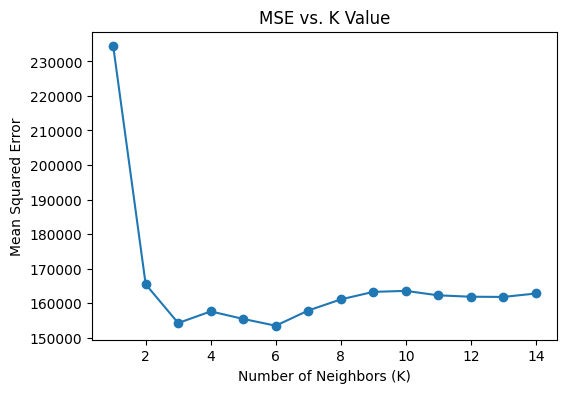

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, [-x for x in cv_scores], marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. K Value')
plt.show()

Choose the K vale with the smallest mean square error. 
So, the optimal K value is 3

In [16]:
knn = KNeighborsRegressor(n_neighbors=3)
model('KNN', knn)

KNN ---> 
Model Accuracy      :  0.6286190918463406
R-squared           :  0.6286190918463406
Mean Squared Error  :  184252.67050851707
Mean Absolute Error :  282.81431906614785


### 1.7 Support Vector Machine

In [17]:
svr = SVR()
model('SVR', svr)

SVR ---> 
Model Accuracy      :  0.017933930582245794
R-squared           :  0.017933930582245794
Mean Squared Error  :  487231.0125084737
Mean Absolute Error :  524.9722480853006


### 1.8 AdaBoost

In [18]:
ada_boost = AdaBoostRegressor()
model('AdaBoost', ada_boost)

AdaBoost ---> 
Model Accuracy      :  0.5103383399150414
R-squared           :  0.5103383399150414
Mean Squared Error  :  242935.1281540787
Mean Absolute Error :  409.68284136415895


### 1.9 Gradient Boosting

In [19]:
gra_boost = GradientBoostingRegressor()
model('GradientBoosting', gra_boost)

GradientBoosting ---> 
Model Accuracy      :  0.7436193226546504
R-squared           :  0.7436193226546504
Mean Squared Error  :  127197.77304254426
Mean Absolute Error :  237.31818145154622


### 1.10 XGBoosting

In [20]:
xgb_reg = XGBRegressor()
model('XGBoosting', xgb_reg)

XGBoosting ---> 
Model Accuracy      :  0.696912395933796
R-squared           :  0.696912395933796
Mean Squared Error  :  150370.4127518595
Mean Absolute Error :  247.51343562619695


## 2. Finding Best Model

In [21]:
models = {
    "1. Logistic Regression": lr,
    "2. Lasso Regression": lasso,
    "3. Ridge Regression": ridge,
    "4. Decision Tree Regressor": dtr,
    "5. Random Forest Regressor": rfr,
    "6. KNN": knn,
    "7. Support Vector Machine": svr,
    "8. AdaBoost": ada_boost,
    "9. Gradient Boosting": gra_boost,
    "10. XGBoosting": xgb_reg
}

In [22]:
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5) # 'cv=5' denotes 5-fold cross-validation.
    cv_results[model_name] = scores

for model_name, scores in cv_results.items():
    print(f"{model_name}\n - Mean Accuracy: {np.mean(scores):.4f}, \n - Std: {np.std(scores):.4f}\n")


1. Logistic Regression
 - Mean Accuracy: 0.7022, 
 - Std: 0.0819

2. Lasso Regression
 - Mean Accuracy: 0.7039, 
 - Std: 0.0792

3. Ridge Regression
 - Mean Accuracy: 0.7031, 
 - Std: 0.0810

4. Decision Tree Regressor
 - Mean Accuracy: 0.6230, 
 - Std: 0.0943

5. Random Forest Regressor
 - Mean Accuracy: 0.7271, 
 - Std: 0.0678

6. KNN
 - Mean Accuracy: 0.6489, 
 - Std: 0.0918

7. Support Vector Machine
 - Mean Accuracy: -0.0361, 
 - Std: 0.0810

8. AdaBoost
 - Mean Accuracy: 0.5340, 
 - Std: 0.1345

9. Gradient Boosting
 - Mean Accuracy: 0.7233, 
 - Std: 0.0751

10. XGBoosting
 - Mean Accuracy: 0.6924, 
 - Std: 0.0508



We select Gradient Boosting based on the mean accuracy. 

## Hyperparameter Tuning

In [23]:
param = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_features': [0.8, 0.5, 0.3]
}

grid_obj = GridSearchCV(estimator=gra_boost, param_grid=param)
grid_fit = grid_obj.fit(X_train, y_train)
best_model = grid_fit.best_estimator_
best_model

GradientBoostingRegressor(learning_rate=0.05, max_features=0.3,
                          n_estimators=500)

In [24]:
best_model.score(X_test, y_test)

0.7446537824376669

In [25]:
#saving model
with open('../predictor_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [26]:
X_train.columns

Index(['Ram', 'Touchscreen', 'IPS', 'HDD', 'SSD', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Dell', 'Company_HP',
       'Company_Lenovo', 'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'Cpu_name_AMD', 'Cpu_name_Intel Core i3', 'Cpu_name_Intel Core i5',
       'Cpu_name_Intel Core i7', 'Cpu_name_Other', 'Gpu_name_AMD',
       'Gpu_name_Intel', 'Gpu_name_Nvidia'],
      dtype='object')

In [27]:
X_test

,Ram,Touchscreen,IPS,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
1024,16,0,1,0,256,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1025,8,0,0,0,256,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1026,4,0,0,500,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1027,8,0,0,500,256,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1028,8,0,0,0,256,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4,1,1,0,128,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1277,16,1,1,0,512,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1278,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1279,6,0,0,1000,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
